In [538]:
import pandas as pd
import matplotlib.pyplot as plt


fil = "stats.csv"

df = pd.read_csv(fil, encoding="latin1", delimiter=";")


In [539]:
df.info()

print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [540]:
df.shape

(217, 30)

In [541]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [542]:
memory_usage = df.memory_usage(deep=True).sum()

print(f"{round(memory_usage/1000,1)} KBs of memory is used on the dataframe")

82.8 KBs of memory is used on the dataframe


In [543]:
df.memory_usage(deep=True)

Index       132
Rk         1736
Player    13507
Pos       11025
Age        1736
Tm        11284
G          1736
GS         1736
MP         1736
FG         1736
FGA        1736
FG%        1736
3P         1736
3PA        1736
3P%        1736
2P         1736
2PA        1736
2P%        1736
eFG%       1736
FT         1736
FTA        1736
FT%        1736
ORB        1736
DRB        1736
TRB        1736
AST        1736
STL        1736
BLK        1736
TOV        1736
PF         1736
PTS        1736
dtype: int64

In [544]:
df[["PTS", "Player"]]

,PTS,Player
0,17.9,Bam Adebayo
1,6.5,Santi Aldama
2,8.4,Nickeil Alexander-Walker
3,11.6,Grayson Allen
4,9.4,Jarrett Allen
...,...,...
212,1.3,Ziaire Williams
213,29.2,Trae Young
214,0.5,Omer Yurtseven
215,2.2,Cody Zeller


In [545]:
df.loc[df["Player"]=="Bam Adebayo", ["PTS", "TRB", "AST"]].values

df.loc[0,"PTS"]

17.9

In [546]:
df.iloc[0, 29]

17.9

In [547]:
df[df["PTS"] > 10][["Player","PTS","AST"]].sort_values(by="AST",ascending=False)

,Player,PTS,AST
213,Trae Young,29.2,10.2
99,Nikola Joki?,30.0,9.5
74,James Harden,20.3,8.3
86,Jrue Holiday,17.8,8.0
61,De'Aaron Fox,27.4,7.7
...,...,...,...
156,Victor Oladipo,11.5,1.0
8,Deandre Ayton,13.4,1.0
40,John Collins,11.3,0.8
12,Harrison Barnes,10.7,0.7


In [548]:
df.nlargest(3, "PTS")[["Player", "PTS"]]

,Player,PTS
113,Kawhi Leonard,34.5
20,Devin Booker,33.7
57,Anthony Edwards,31.6


In [549]:
# df.agg({"PTS": "sum", "AST": "median"})


df.agg({"PTS": "max"})

PTS    34.5
dtype: float64

In [550]:
df["Pos"].value_counts()



Pos
SG    52
SF    44
C     42
PF    42
PG    37
Name: count, dtype: int64

In [551]:
# df["PTS"].apply(lambda x: x * 2)

In [552]:
df.isna().sum().sum() # første sum dinner kolonner, andre sum finner hele datasettet

0

In [553]:
df[(df["PTS"] > 20) & (df["AST"] > 5)][["Player", "Tm"]]

,Player,Tm
6,Giannis Antetokounmpo,MIL
20,Devin Booker,PHO
29,Jalen Brunson,NYK
31,Jimmy Butler,MIA
47,Stephen Curry,GSW
56,Kevin Durant,PHO
57,Anthony Edwards,MIN
61,De'Aaron Fox,SAC
74,James Harden,PHI
95,LeBron James,LAL


In [554]:
df["PTS"].std()

8.3756922919144

In [555]:
df["AST"].corr(df["TOV"])

0.7995540370064588

In [556]:
df["PTS"].value_counts()

PTS
0.0     24
0.5      6
1.3      5
1.0      5
1.8      5
        ..
15.3     1
20.3     1
12.2     1
10.2     1
2.2      1
Name: count, Length: 129, dtype: int64

In [557]:
sorted(df["PTS"].unique(), reverse=True)

[34.5,
 33.7,
 31.6,
 30.5,
 30.0,
 29.2,
 29.0,
 27.8,
 27.4,
 27.2,
 26.9,
 26.1,
 24.6,
 24.5,
 23.8,
 23.7,
 23.6,
 23.5,
 23.3,
 23.2,
 23.0,
 22.7,
 22.6,
 21.8,
 20.6,
 20.5,
 20.3,
 19.3,
 19.0,
 18.5,
 18.2,
 18.0,
 17.9,
 17.8,
 16.9,
 16.7,
 16.6,
 16.5,
 16.4,
 15.3,
 15.0,
 14.9,
 13.4,
 13.3,
 12.7,
 12.4,
 12.2,
 12.0,
 11.9,
 11.6,
 11.5,
 11.3,
 10.7,
 10.6,
 10.5,
 10.4,
 10.3,
 10.2,
 9.8,
 9.7,
 9.6,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 7.9,
 7.8,
 7.7,
 7.5,
 7.4,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.8,
 5.5,
 5.1,
 5.0,
 4.9,
 4.8,
 4.6,
 4.5,
 4.4,
 4.3,
 4.1,
 4.0,
 3.8,
 3.7,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.7,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.8,
 1.5,
 1.4,
 1.3,
 1.0,
 0.8,
 0.7,
 0.5,
 0.4,
 0.3,
 0.0]

In [558]:
df["Tm"].nunique()

16

In [559]:
df["Tm"].unique()

array(['MIA', 'MEM', 'MIN', 'MIL', 'CLE', 'PHO', 'GSW', 'LAL', 'SAC',
       'NYK', 'LAC', 'ATL', 'DEN', 'BRK', 'BOS', 'PHI'], dtype=object)

In [560]:
df["Tm"].value_counts()

Tm
MIA    15
MIL    15
LAL    15
DEN    15
PHI    15
PHO    14
LAC    14
BRK    14
BOS    14
MIN    13
CLE    13
GSW    13
SAC    13
MEM    12
NYK    12
ATL    10
Name: count, dtype: int64

In [561]:
df.query("PTS > 25 and AST > 7.5")[["Player", "PTS", "AST"]].sort_values(by="PTS", ascending=False)

,Player,PTS,AST
99,Nikola Joki?,30.0,9.5
213,Trae Young,29.2,10.2
61,De'Aaron Fox,27.4,7.7


In [562]:
df[df["PTS"] > 25][["Player", "PTS"]].sort_values(by="PTS", ascending=False)

,Player,PTS
113,Kawhi Leonard,34.5
20,Devin Booker,33.7
57,Anthony Edwards,31.6
47,Stephen Curry,30.5
99,Nikola Joki?,30.0
213,Trae Young,29.2
56,Kevin Durant,29.0
29,Jalen Brunson,27.8
61,De'Aaron Fox,27.4
191,Jayson Tatum,27.2


In [563]:
df.pivot_table(values=["PTS","MP"], index="AST", aggfunc="mean").sort_values(by="PTS", ascending=False)

,MP,PTS
AST,,
6.0,40.000000,34.500000
5.2,39.800000,31.600000
6.1,37.900000,30.500000
9.5,39.500000,30.000000
10.2,38.300000,29.200000
...,...,...
0.2,7.066667,2.266667
0.9,10.300000,1.800000
0.1,4.550000,1.625000


In [564]:
df.groupby("Tm")["PTS"].sum().sort_values(ascending=False)

Tm
LAC    139.8
MIL    137.5
MIA    134.4
PHO    130.5
ATL    119.6
BOS    118.9
SAC    118.1
LAL    118.0
GSW    117.5
DEN    117.0
MEM    111.2
PHI    111.2
MIN    108.2
NYK    105.2
BRK    101.4
CLE     99.2
Name: PTS, dtype: float64

In [565]:
df.groupby("Tm")["PTS"].mean().sort_values(ascending=False)

Tm
ATL    11.960000
LAC     9.985714
PHO     9.321429
MEM     9.266667
MIL     9.166667
SAC     9.084615
GSW     9.038462
MIA     8.960000
NYK     8.766667
BOS     8.492857
MIN     8.323077
LAL     7.866667
DEN     7.800000
CLE     7.630769
PHI     7.413333
BRK     7.242857
Name: PTS, dtype: float64

In [566]:
print(f"{df.nlargest(20, "PTS")[["Player", "PTS"]]}\n")

                    Player   PTS
113          Kawhi Leonard  34.5
20            Devin Booker  33.7
57         Anthony Edwards  31.6
47           Stephen Curry  30.5
99            Nikola Joki?  30.0
213             Trae Young  29.2
56            Kevin Durant  29.0
29           Jalen Brunson  27.8
61            De'Aaron Fox  27.4
191           Jayson Tatum  27.2
31            Jimmy Butler  26.9
145           Jamal Murray  26.1
142              Ja Morant  24.6
95            LeBron James  24.5
132        Khris Middleton  23.8
59             Joel Embiid  23.7
207      Russell Westbrook  23.6
11            Desmond Bane  23.5
23           Mikal Bridges  23.5
6    Giannis Antetokounmpo  23.3



In [567]:
print(df.nlargest(10, 'PTS'))

df.sort_values('PTS', ascending=False).head(10)

      Rk           Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...    FT%  \
113  114    Kawhi Leonard  SF   31  LAC   2   2  40.0  12.0  22.0  ...  0.882   
20    21     Devin Booker  SG   26  PHO  11  11  41.7  12.8  21.9  ...  0.866   
57    58  Anthony Edwards  SG   21  MIN   5   5  39.8  11.0  22.8  ...  0.846   
47    48    Stephen Curry  PG   34  GSW  13  13  37.9  11.2  23.9  ...  0.845   
99   100     Nikola Joki?   C   27  DEN  20  20  39.5  11.4  20.7  ...  0.799   
213  214       Trae Young  PG   24  ATL   6   6  38.3  10.0  24.8  ...  0.860   
56    57     Kevin Durant  PF   34  PHO  11  11  42.4   9.7  20.4  ...  0.917   
29    30    Jalen Brunson  PG   26  NYK  11  11  40.3   9.9  20.9  ...  0.912   
61    62     De'Aaron Fox  PG   25  SAC   7   7  38.6  10.0  23.6  ...  0.756   
191  192     Jayson Tatum  SF   24  BOS  20  20  40.0   9.3  20.2  ...  0.876   

     ORB   DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
113  1.5   5.0   6.5   6.0  2.0  0.5  3.0  2.5  34.5 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
113,114,Kawhi Leonard,SF,31,LAC,2,2,40.0,12.0,22.0,...,0.882,1.5,5.0,6.5,6.0,2.0,0.5,3.0,2.5,34.5
20,21,Devin Booker,SG,26,PHO,11,11,41.7,12.8,21.9,...,0.866,1.1,3.7,4.8,7.2,1.7,0.8,2.9,3.4,33.7
57,58,Anthony Edwards,SG,21,MIN,5,5,39.8,11.0,22.8,...,0.846,0.6,4.4,5.0,5.2,1.8,2.0,1.6,2.6,31.6
47,48,Stephen Curry,PG,34,GSW,13,13,37.9,11.2,23.9,...,0.845,0.7,4.5,5.2,6.1,1.0,0.5,3.2,2.6,30.5
99,100,Nikola Joki?,C,27,DEN,20,20,39.5,11.4,20.7,...,0.799,3.5,10.0,13.5,9.5,1.1,1.0,3.5,3.5,30.0
213,214,Trae Young,PG,24,ATL,6,6,38.3,10.0,24.8,...,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
56,57,Kevin Durant,PF,34,PHO,11,11,42.4,9.7,20.4,...,0.917,0.6,8.1,8.7,5.5,0.8,1.4,3.5,2.6,29.0
29,30,Jalen Brunson,PG,26,NYK,11,11,40.3,9.9,20.9,...,0.912,0.8,4.1,4.9,5.6,1.5,0.1,2.1,2.4,27.8
61,62,De'Aaron Fox,PG,25,SAC,7,7,38.6,10.0,23.6,...,0.756,1.7,3.7,5.4,7.7,2.1,0.6,4.0,3.3,27.4
191,192,Jayson Tatum,SF,24,BOS,20,20,40.0,9.3,20.2,...,0.876,1.3,9.2,10.5,5.3,1.1,1.1,2.8,2.2,27.2


In [568]:
print(f"{df[df["Player"] == "Kawhi Leonard"]["PTS"]}")

113    34.5
Name: PTS, dtype: float64


In [569]:
#teams = df["Tm"].unique().tolist()


df[df["PTS"] > 20][["Player", "Tm", "PTS"]]["Tm"].value_counts().idxmax



<bound method Series.idxmax of Tm
PHI    3
LAC    3
MIL    2
MEM    2
PHO    2
BOS    2
LAL    2
CLE    2
DEN    2
ATL    2
BRK    1
NYK    1
MIA    1
GSW    1
MIN    1
SAC    1
Name: count, dtype: int64>

0.8950787976558213


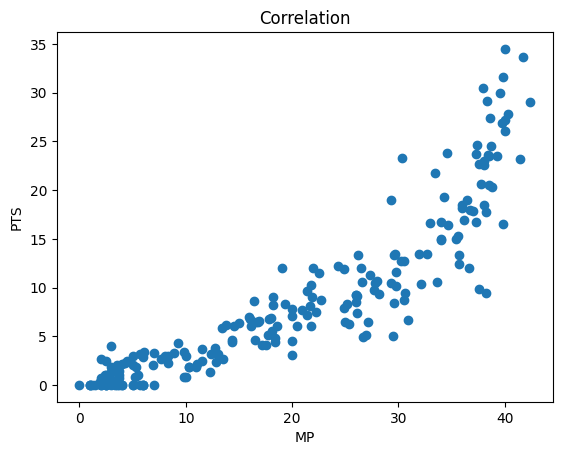

In [570]:
plt.scatter(df["MP"], df["PTS"])
plt.xlabel("MP")
plt.ylabel("PTS")
plt.title("Correlation")

# Calculate and display correlation
correlation = df["PTS"].corr(df["MP"])

print(correlation)

plt.show()

In [571]:
print(df.nlargest(10,"3P%")[["Player", "3P%", "3P", "3PA"]])

                 Player    3P%   3P  3PA
16     MarJon Beauchamp  1.000  0.5  0.5
78   Shaquille Harrison  1.000  0.1  0.1
107         Luke Kornet  1.000  0.1  0.1
154      Onyeka Okongwu  1.000  0.2  0.2
188       Lamar Stevens  1.000  0.5  0.5
113       Kawhi Leonard  0.600  3.0  5.0
140         Moses Moody  0.591  1.1  1.8
125     Wesley Matthews  0.571  2.0  3.5
20         Devin Booker  0.508  2.8  5.5
53            PJ Dozier  0.500  0.7  1.3


In [572]:
teams = df["Tm"].unique().tolist()


team_rebounds = df.groupby("Tm")["TRB"].sum()
print(team_rebounds.sort_values(ascending=False))

Tm
MIL    51.7
GSW    50.1
SAC    49.3
MEM    49.0
LAL    48.4
MIA    48.3
PHI    47.8
PHO    47.8
BOS    47.7
DEN    47.7
NYK    47.2
LAC    46.1
ATL    45.0
MIN    41.2
CLE    40.5
BRK    38.0
Name: TRB, dtype: float64


In [573]:
df["Eff"] = df["eFG%"] * df["PTS"] + df["AST"] - df["TOV"]

df.nlargest(5,"Eff")[["Player","eFG%","PTS","AST","TOV", "Eff"]]

,Player,eFG%,PTS,AST,TOV,Eff
20,Devin Booker,0.649,33.7,7.2,2.9,26.1713
113,Kawhi Leonard,0.614,34.5,6.0,3.0,24.1830
99,Nikola Joki?,0.591,30.0,9.5,3.5,23.7300
57,Anthony Edwards,0.548,31.6,5.2,1.6,20.9168
47,Stephen Curry,0.558,30.5,6.1,3.2,19.9190


In [574]:
df.nlargest(10,"TRB")[["Player", "Pos", "TRB"]]

,Player,Pos,TRB
48,Anthony Davis,C,14.1
99,Nikola Joki?,C,13.5
117,Kevon Looney,C,13.1
64,Rudy Gobert,C,12.2
6,Giannis Antetokounmpo,PF,11.0
181,Domantas Sabonis,C,11.0
191,Jayson Tatum,SF,10.5
197,Karl-Anthony Towns,PF,10.2
138,Evan Mobley,PF,10.0
0,Bam Adebayo,C,9.9


In [575]:
print(df[df["Rk"]==0])

Empty DataFrame
Columns: [Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Eff]
Index: []

[0 rows x 31 columns]


In [576]:
df["3PAT"] = round(df["G"] * df["3PA"], 0)

df[df["3PAT"] > 50][["Player", "3P%", "3PAT", "G"]].sort_values(by="3P%", ascending=False)

,Player,3P%,3PAT,G
20,Devin Booker,0.508,60.0,11
99,Nikola Joki?,0.461,76.0,20
208,Derrick White,0.455,110.0,20
171,Austin Reaves,0.443,88.0,16
174,Duncan Robinson,0.442,113.0,23
124,Caleb Martin,0.423,104.0,23
126,Tyrese Maxey,0.400,85.0,11
145,Jamal Murray,0.396,150.0,20
32,Kentavious Caldwell-Pope,0.380,92.0,20
24,Malcolm Brogdon,0.379,87.0,19


In [577]:
team_rebounds = df.groupby("Tm")["TOV"].sum()
print(team_rebounds.sort_values(ascending=False))

Tm
CLE    16.9
LAC    16.5
MIL    16.3
MIN    14.7
GSW    14.4
SAC    14.4
NYK    14.1
BRK    14.0
MEM    13.8
ATL    13.5
MIA    13.2
PHI    13.0
PHO    13.0
BOS    12.7
LAL    11.7
DEN    11.6
Name: TOV, dtype: float64


In [578]:
Pos_avgs = df.groupby("Pos")["PTS"].mean()

Pos_avgs_all = df.groupby("Pos").mean(numeric_only=True)
print(Pos_avgs_all)

print(Pos_avgs)

             Rk        Age         G        GS         MP        FG       FGA  \
Pos                                                                             
C    106.523810  27.761905  7.785714  4.119048  17.988095  2.816667  5.311905   
PF   100.404762  27.880952  8.690476  4.309524  19.578571  3.023810  6.747619   
PG   123.648649  28.621622  8.189189  4.702703  22.378378  3.921622  9.537838   
SF   109.863636  26.090909  8.113636  3.568182  17.836364  2.863636  6.454545   
SG   106.788462  25.500000  7.230769  2.980769  20.465385  3.396154  7.528846   

          FG%        3P       3PA  ...       DRB       TRB       AST  \
Pos                                ...                                 
C    0.481548  0.180952  0.616667  ...  3.535714  5.304762  1.319048   
PF   0.388286  0.859524  2.673810  ...  3.026190  3.909524  1.580952   
PG   0.325676  1.337838  4.010811  ...  2.167568  2.616216  3.689189   
SF   0.371614  1.127273  3.179545  ...  2.411364  2.997727  1.286364   


In [579]:


df[df["PTS"]>25][["PTS","Player"]].sort_values(by="PTS",ascending=False).to_csv("lagre.csv", index=False)

In [580]:
df[(df["PTS"] >= 15) & 
    (df["Pos"] == "C")]["Player"].tolist()# &
    #(df["Tm"] == "PHI")]

['Bam Adebayo',
 'Anthony Davis',
 'Joel Embiid',
 'Rudy Gobert',
 'Jaren Jackson Jr.',
 'Nikola Joki?',
 'Brook Lopez',
 'Domantas Sabonis']

In [581]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int8')
    elif df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int8   
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int8   
 4   Tm      217 non-null    object 
 5   G       217 non-null    int8   
 6   GS      217 non-null    int8   
 7   MP      217 non-null    float16
 8   FG      217 non-null    float16
 9   FGA     217 non-null    float16
 10  FG%     217 non-null    float16
 11  3P      217 non-null    float16
 12  3PA     217 non-null    float16
 13  3P%     217 non-null    float16
 14  2P      217 non-null    float16
 15  2PA     217 non-null    float16
 16  2P%     217 non-null    float16
 17  eFG%    217 non-null    float16
 18  FT      217 non-null    float16
 19  FTA     217 non-null    float16
 20  FT%     217 non-null    float16
 21  ORB     217 non-null    float16
 22  DR

In [582]:
df.memory_usage(deep=True)

Index       132
Rk          217
Player    13507
Pos       11025
Age         217
Tm        11284
G           217
GS          217
MP          434
FG          434
FGA         434
FG%         434
3P          434
3PA         434
3P%         434
2P          434
2PA         434
2P%         434
eFG%        434
FT          434
FTA         434
FT%         434
ORB         434
DRB         434
TRB         434
AST         434
STL         434
BLK         434
TOV         434
PF          434
PTS         434
Eff         434
3PAT        434
dtype: int64

In [583]:
memory_usage = df.memory_usage(deep=True).sum()

print(f"{round(memory_usage/1000,1)} KBs of memory is used on the dataframe")

47.7 KBs of memory is used on the dataframe
